In [1]:
import numpy as np
from tensorflow import keras as K

In [4]:
model = K.Sequential([
    K.layers.Dense(units=4, input_shape=((2,))),
])

weight, bias = model.layers[0].get_weights()
print("Weights shape is {}".format(weight.shape))
print("Bias shape is {}".format(bias.shape))

x = np.random.rand(1, 2)
y = model.predict(x)

print("x is ({}) and y is ({})".format(x.shape, y.shape))

Weights shape is (2, 4)
Bias shape is (4,)
x is ((1, 2)) and y is ((1, 4))


## 複数層のNN

In [5]:
from tensorflow.python import keras as K

In [6]:
model = K.Sequential([
    K.layers.Dense(units=4, input_shape=((2,)), activation="sigmoid"),
    K.layers.Dense(units=4),
])

batch = np.random.rand(3, 2)

y = model.predict(batch)
print(y.shape)

(3, 4)


## パラメータ調整

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python import keras as K

In [8]:
dataset = load_boston()

y = dataset.target
X = dataset.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

Epoch 1/8
11/11 [==============================] - 0s 1ms/step - loss: 173.8888
Epoch 2/8
11/11 [==============================] - 0s 637us/step - loss: 61.3577
Epoch 3/8
11/11 [==============================] - 0s 728us/step - loss: 30.8729
Epoch 4/8
11/11 [==============================] - 0s 726us/step - loss: 31.5098
Epoch 5/8
11/11 [==============================] - 0s 726us/step - loss: 49.2832
Epoch 6/8
11/11 [==============================] - 0s 726us/step - loss: 28.4637
Epoch 7/8
11/11 [==============================] - 0s 818us/step - loss: 25.2840
Epoch 8/8
11/11 [==============================] - 0s 636us/step - loss: 30.4825


<function matplotlib.pyplot.show(close=None, block=None)>

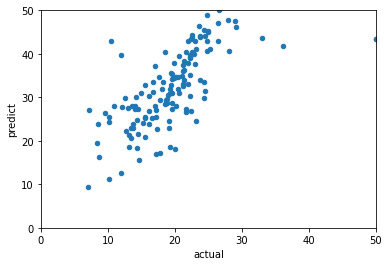

In [12]:
model = K.Sequential([
    K.layers.BatchNormalization(input_shape=(13,)),
    K.layers.Dense(units=13, activation="softplus", kernel_regularizer="l1"),
    K.layers.Dense(units=1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=8)

predicts = model.predict(X_test)
result = pd.DataFrame({
    "predict" : np.reshape(predicts, (-1,)),
    "actual": y_test
})
limit = np.max(y_test)

result.plot.scatter(x="actual", y="predict", xlim=(0,limit), ylim=(0,limit))
plt.show

## 実際に適用

In [1]:
import os
import io
import re
from collections import namedtuple
from collections import deque
import numpy as np
import tensorflow as tf
from tensorflow.python import keras as K
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
Experience = namedtuple("Experience",
                       ["s", "a", "r", "n_s", "d"])

In [16]:
class FNAgent():
    
    def __init__(self, epsilon, actions):
        self.epsilon = epsilon
        self.actions = actions
        self.model = None
        self.estimate_probs = False
        self.initialized = False
        
    def save(self, model_path):
        self.model.save(model, overwrite=True, include_optimizer=False)
        
    @classmethod
    def load(cls, env, model_path, epsilon=0.0001):
        actions = list(range(env.action_space.n))
        agent = cls(epsilon, actions)
        agent.model = K.models.load_model(model_path)
        agent.initialized = True
        return agent
    
    def initialize(self, experiences):
        raise NotImplementedError("You have to implement initialize method")
        
    def estimate(self, s):
        raise NotImplementedError("You have to implement initialize method")
        
    def update(self, experiences, gamma):
        raise NotImplementedError("You have to implement initialize method")
        
    def policy(self, s):
        if np.random.random() < self.epsilon or not self.initialized:
            return np.random.randint(len(self.actions))
        else:
            estimates = self.estimate(s)
            if self.estimate_probs:
                action = np.random.choice(self.actions, size=1, p=estimates)[0]
                return action
            else:
                return np.argmax(estimates)
            
    def play(self, env, episode_count=5, render=True):
        for e in range(episode_count):
            s = env.reset()
            done = False
            episode_reward = 0
            while not done:
                if render:
                    env.render()
                a = self.policy(s)
                n_state, reward, done, info = env.step(a)
                episode_reward += reward
                s = n_state
            else:
                print("Get reward {}".format(episode_reward))

In [ ]:
class Trainer():
    
    def __init__(self, buffer_size=1024, batch_size=32,
                gamma=0.9, report_interval=10, log_dir=""):
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.report_interval = report_interval
        self.logger = Logger(log_dir, self.trainer_name)
        self.experiences = deque(maxlen=buffer_size)
        self.training = False
        self.training_count = 0
        self.reward_log = []
        
    @property
    def Trainer_name(self):
        class_name = self.class.name
        snaked = re.sub("(.)([A-Z][a-z]+)", r"\1_\2", class_name)
        snaked = re.sub("([a-z0-9])([A-Z])",r"\1_\2", snaked).lower()
        snaked.replace("_trainer", "")
        return snaked
    
    def train_loop(self, env, agent, episode=200, initial_count=-1,
                  render=False, observe_interval=0):
        self.experiences = deque(maxlen=self.buffer_size)
        self.training = False
        self.training_count = 0
        self.reward_log = []
        frames = []
        
        for i in range(episode):
            s = env.reset()
            done = False
            step_count = 0
            self.episode_begin(i, agent)
            while not done:
                if render:
                    env.render()
                    

In [3]:
from base_utils import *

class State():
    def __init__(self, row=-1, column=-1):
        self.column = column
        self.row = row

    # 状態の表現
    def repr(self):
        return "<State:[{}, {}]>".format(self.row, self.column)
    # クローン生成

    def clone(self):
        return State(self.row, self.column)
    # ハッシュ型のクローン?

    def __hash__(self):
        return hash((self.row, self.column))

    # 同値判定
    def __eq__(self, other):
        return self.row == other.row and self.column == other.column

state1 = State(1, 0)
state2 = State(1, 0)
state1 == state2
aiueo={}
aiueo[state1]=3
aiueo[state2]=2
aiueo

{<__main__.State at 0x231ab668a48>: 2}

In [3]:
from collections import defaultdict
Q = []
for i in range(4):
    Q.append([])
for i in range(4):
    for j in range(4):
        Q[i].append(defaultdict(lambda: [0] * 4))


print(Q[0][0])
print(Q[0][1])
print(Q[0][2])
print(Q[0][3])

defaultdict(<function <lambda> at 0x000001EFF89F6A68>, {})
defaultdict(<function <lambda> at 0x000001EFF89F6DC8>, {})
defaultdict(<function <lambda> at 0x000001EFF89F6E58>, {})
defaultdict(<function <lambda> at 0x000001EFF89F6EE8>, {})


In [3]:
state_transition_header_label=['Step', 'state', 'action', 'reward', 'total_reward']
state_transition_with_goal_header_label=['Step', 'state', 'action', 'reward', 'total_reward', 'my_goal', 'est_other_goal']
len(state_transition_header_label)
len(state_transition_with_goal_header_label)
dict_A={'Step':1, 'state':2, 'action':3, 'reward':4, 'total_reward':5}
len(dict_A)

5